Using Meta's Segment Anything?

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import sys
import pandas as pd
sys.path.append('..')
from lariat import Event

In [21]:
deuterons = pd.read_csv('/Users/user/data/research/proton-deuteron/csv/deuteron_candidates_bbox_t100.csv') # from within vertices bounding box
protons = pd.read_csv('/Users/user/data/research/proton-deuteron/csv/protons_one_track_filepaths.csv') # with only one track from reco

In [5]:
sam = sam_model_registry["vit_h"](checkpoint="/Users/user/data/research/SAM/sam_vit_h_4b8939.pth")

In [6]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [10]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [28]:
image = cv2.imread("/Users/user/data/research/proton-deuteron/deuteron_event_images/run_8563_subrun_103_event_5217.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

masks = mask_generator.generate(image)


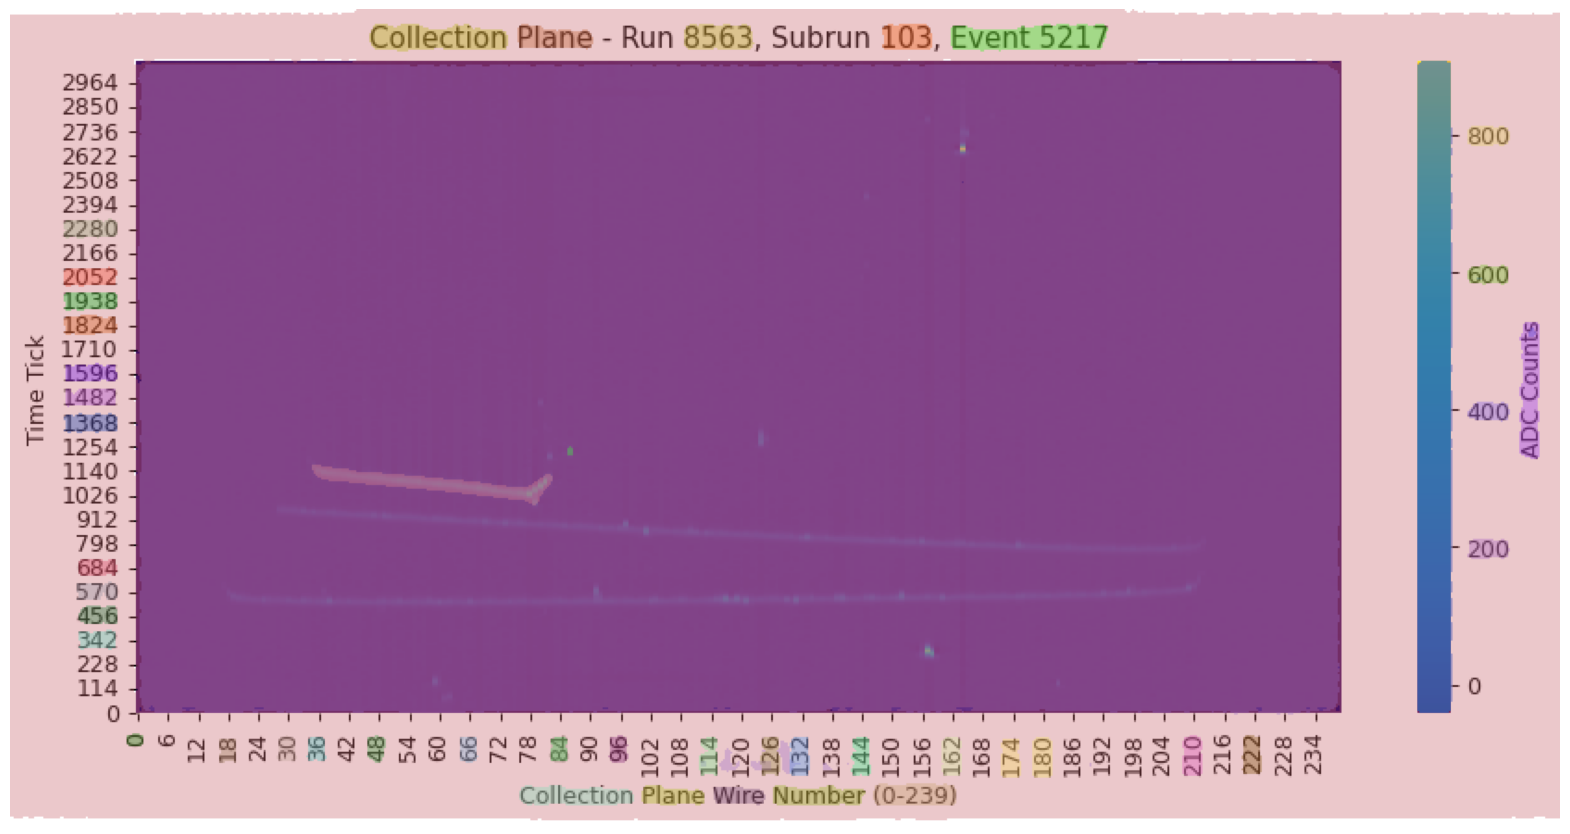

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()